In [1]:
import matplotlib.pyplot as plt

from chainercv.datasets import voc_bbox_label_names
from chainercv.links import SSD300
from chainercv.utils import read_image
from chainercv.visualizations import vis_bbox

%matplotlib inline

plt.rcParams['figure.figsize'] = (14,10)

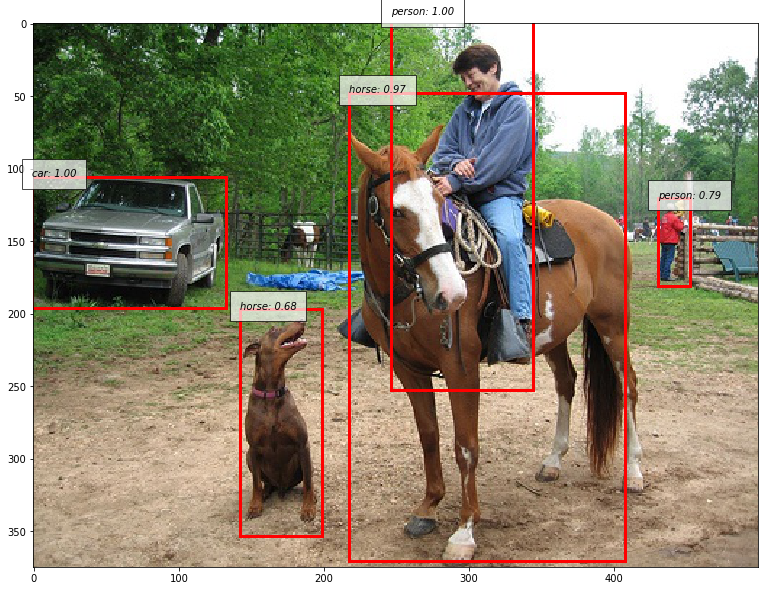

In [2]:
# Read an RGB image and return it in CHW format.
img = read_image('sample.jpg')
model = SSD300(pretrained_model='voc0712')
bboxes, labels, scores = model.predict([img])
vis_bbox(img, bboxes[0], labels[0], scores[0],
         label_names=voc_bbox_label_names)
plt.show()

In [3]:
bboxes[0]

array([[105.520386 ,  -1.4983816, 195.8264   , 132.64653  ],
       [ 47.337307 , 217.55597  , 370.2643   , 407.5418   ],
       [196.96555  , 141.91435  , 352.90866  , 198.70297  ],
       [ -6.224743 , 246.17906  , 252.34036  , 344.5772   ],
       [120.361755 , 430.33664  , 180.8655   , 452.32462  ]],
      dtype=float32)

In [7]:
path = '/home/sean/Desktop/lego_downloads_reduced/brick_1x2/'

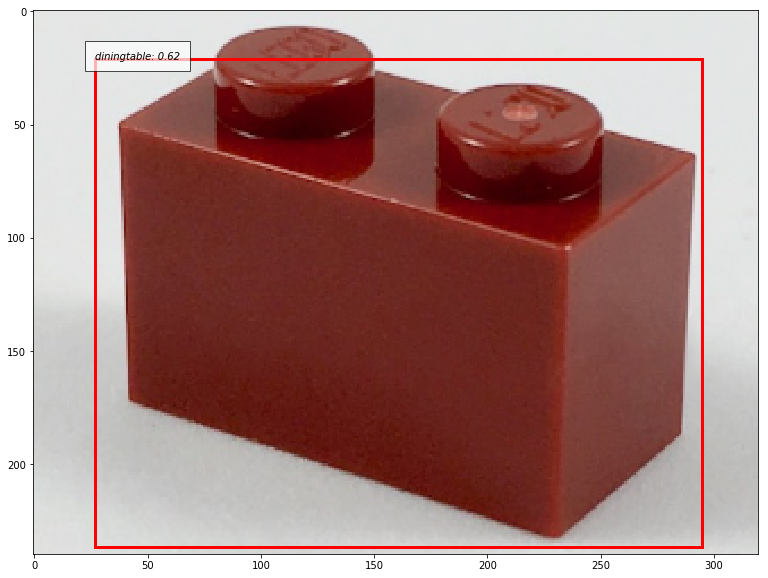

In [9]:
# Read an RGB image and return it in CHW format.
img = read_image(path+'36. 3004.png')
model = SSD300(pretrained_model='voc0712')
bboxes, labels, scores = model.predict([img])
vis_bbox(img, bboxes[0], labels[0], scores[0],
         label_names=voc_bbox_label_names)
plt.show()

In [11]:
import chainercv

In [12]:

chainercv.__file__

'/home/sean/anaconda/lib/python2.7/site-packages/chainercv/__init__.pyc'

In [13]:
from chainer.datasets import ConcatenatedDataset
from chainer.datasets import TransformDataset
from chainer import training
from chainer.training import extensions
from chainer.training.triggers import ManualScheduleTrigger

from chainercv.datasets import voc_bbox_label_names
from chainercv.datasets import VOCBboxDataset
from chainercv.extensions import DetectionVOCEvaluator
from chainercv.links import FasterRCNNVGG16
from chainercv.links.model.faster_rcnn import FasterRCNNTrainChain
from chainercv import transforms

In [15]:
train_data = ConcatenatedDataset(
            VOCBboxDataset(year='2007', split='trainval'),
            VOCBboxDataset(year='2012', split='trainval'))
test_data = VOCBboxDataset(split='test', year='2007',
                               use_difficult=True, return_difficult=True)


From: http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
To: /home/sean/.chainer/dataset/_dl_cache/92029705a99338d0932803388148a725
  %   Total    Recv       Speed  Time left
100 1907MiB 1907MiB   2830KiB/s    0:00:00

In [17]:
from PIL import Image
import cv2

def cv2_pil( cv2_image ):
    return Image.fromarray( cv2_image )

def pil_cv2( pil_image ):
    open_cv_image = numpy.array(pil_image) 
    return open_cv_image[:, :, ::-1].copy()

In [19]:
train_data[0]

(array([[[ 11.,  13.,  10., ..., 164., 163., 162.],
         [  4.,   8.,  11., ..., 161., 161., 161.],
         [ 45.,  26.,  15., ..., 163., 163., 163.],
         ...,
         [ 31.,  33.,  25., ...,  58.,  59.,  58.],
         [ 38.,  35.,  37., ...,  65.,  69.,  69.],
         [ 49.,  61.,  73., ...,  64.,  68.,  69.]],
 
        [[  9.,  13.,  10., ..., 187., 186., 185.],
         [  4.,   8.,  11., ..., 188., 188., 188.],
         [ 49.,  27.,  16., ..., 190., 190., 190.],
         ...,
         [ 12.,  17.,  12., ...,  71.,  72.,  71.],
         [  7.,   6.,   8., ...,  80.,  84.,  84.],
         [ 17.,  21.,  25., ...,  79.,  83.,  84.]],
 
        [[ 10.,  13.,  10., ..., 193., 192., 191.],
         [  6.,   8.,  11., ..., 195., 195., 195.],
         [ 52.,  31.,  18., ..., 199., 199., 199.],
         ...,
         [  8.,  17.,   6., ..., 103., 104., 103.],
         [  2.,   2.,   0., ..., 109., 113., 113.],
         [  4.,  13.,  15., ..., 108., 112., 113.]]], dtype=float32)

In [21]:
train_data[0][0]

array([[[ 11.,  13.,  10., ..., 164., 163., 162.],
        [  4.,   8.,  11., ..., 161., 161., 161.],
        [ 45.,  26.,  15., ..., 163., 163., 163.],
        ...,
        [ 31.,  33.,  25., ...,  58.,  59.,  58.],
        [ 38.,  35.,  37., ...,  65.,  69.,  69.],
        [ 49.,  61.,  73., ...,  64.,  68.,  69.]],

       [[  9.,  13.,  10., ..., 187., 186., 185.],
        [  4.,   8.,  11., ..., 188., 188., 188.],
        [ 49.,  27.,  16., ..., 190., 190., 190.],
        ...,
        [ 12.,  17.,  12., ...,  71.,  72.,  71.],
        [  7.,   6.,   8., ...,  80.,  84.,  84.],
        [ 17.,  21.,  25., ...,  79.,  83.,  84.]],

       [[ 10.,  13.,  10., ..., 193., 192., 191.],
        [  6.,   8.,  11., ..., 195., 195., 195.],
        [ 52.,  31.,  18., ..., 199., 199., 199.],
        ...,
        [  8.,  17.,   6., ..., 103., 104., 103.],
        [  2.,   2.,   0., ..., 109., 113., 113.],
        [  4.,  13.,  15., ..., 108., 112., 113.]]], dtype=float32)

In [25]:
ccv_img = train_data[0][0].astype('uint8')
print ccv_img.shape

(3, 375, 500)


In [29]:
img = cv2_pil( ccv_img[:,:,::-1] )

TypeError: Cannot handle this data type